In [20]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='a46c7360-91b7-4276-ad14-c8b826575126', project_access_token='p-859d7df94e916d3bf88ccbc535cc1331d87ec8a2')
pc = project.project_context


In [21]:
ibmcloud_api_key = ''

In [22]:
try:
    project
except NameError:
    # READING AND WRITING PROJECT ASSETS
    import project_lib
    project = project_lib.Project() 

In [104]:
#Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model, metrics
import json


In [53]:
use_cols_fossil=['year','fossil_cons_per_capita']
use_cols_renew=['year','renewables_energy_per_capita']
use_cols_co2=['year','co2_per_capita']

In [25]:
#Loading Fossil fuel data
my_file = project.get_file('india_data.csv')
my_file.seek(0)
df = pd.read_csv(my_file,parse_dates=['year'],usecols=use_cols_fossil,index_col=['year'])

df.head()

,fossil_cons_per_capita
year,
1900-01-01,NaN
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN


In [26]:
df['fossil_cons_per_capita'].fillna((df['fossil_cons_per_capita'].median()), inplace=True)#Handling missing values

In [27]:
print(df['fossil_cons_per_capita'].dtype)
print(df.isna().sum())

float64
fossil_cons_per_capita    0
dtype: int64


In [28]:
#Splitting data into Training and Testing
y_to_train = df[:'2000-01-01']
y_to_val = df['2020-01-01':]

In [29]:
#Training the ARIMA Model and printing the summary report
arima= ARIMA(y_to_train,order=(1,0,1))
model=arima.fit()
print (model.summary())

                                ARMA Model Results                                
Dep. Variable:     fossil_cons_per_capita   No. Observations:                  101
Model:                         ARMA(1, 1)   Log Likelihood                -471.301
Method:                           css-mle   S.D. of innovations             25.544
Date:                    Fri, 18 Jun 2021   AIC                            950.601
Time:                            07:35:58   BIC                            961.062
Sample:                        01-01-1900   HQIC                           954.836
                             - 01-01-2000                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          393.9255     17.697     22.259      0.000     359.240     428.611
ar.L1.fossil_cons_per_capita     0.8583      

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [30]:
#Making Predictions on the data
pred= model.predict(end=len(y_to_train)+25)


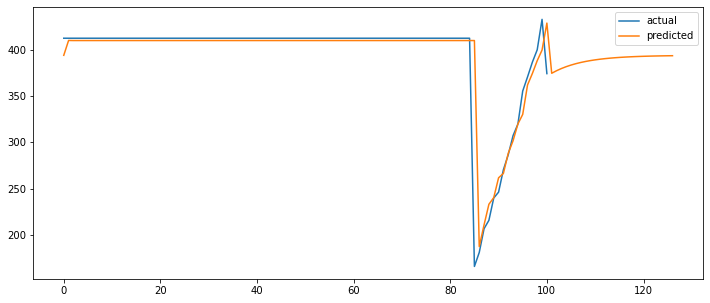

In [31]:
#Plotting the Actual and Predicted Values
plt.figure(figsize=(12,5))
plt.plot(y_to_train['fossil_cons_per_capita'].values,label='actual')
plt.plot(pred.values,label='predicted')
plt.legend()
plt.show()

In [32]:
#Forecasted data for Next Five Years
df_forecasted_fossil=pred.to_frame()
df_forecasted_fossil.columns=['consumption']
df_forecasted_fossil.index.names=['year']
df_forecasted_fossil.reset_index(level=0, inplace=True)
df2=df_forecasted_fossil[121:]

Text(0.5, 1.0, 'Forecasted Fossil energy consumption per capita')

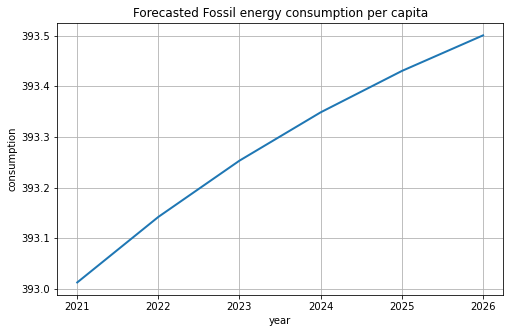

In [33]:
#Plotting thee forecasted data for Next Five Years
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='consumption',data=df2,linewidth=2)
plt.grid(True)
plt.title('Forecasted Fossil energy consumption per capita')

In [34]:
#Saving the Forecasted values as CSV
project.save_data(file_name = "Fossil_fuel_forecast.csv",data = df2.to_csv(index=False))

{'file_name': 'Fossil_fuel_forecast.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'c5d0fef0-df55-4c9e-afef-c4c77188e384'}

In [107]:
#Saving the Forecated values as JSON
project.save_data(file_name = "Fossil_fuel_forecast.json",data = df2.to_json())

{'file_name': 'Fossil_fuel_forecast.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '22162628-5fe4-484b-a5fa-7c7d64b772f3'}

In [35]:
#Loading Renewable Energy Data

my_file_renew = project.get_file('india_data.csv')
my_file_renew.seek(0)
df_renew = pd.read_csv(my_file_renew,parse_dates=['year'],usecols=use_cols_renew,index_col=['year'])

df_renew.head()


,renewables_energy_per_capita
year,
1900-01-01,NaN
1901-01-01,NaN
1902-01-01,NaN
1903-01-01,NaN
1904-01-01,NaN


In [36]:
#Handling Missing Data
df_renew['renewables_energy_per_capita'].fillna((df_renew['renewables_energy_per_capita'].median()), inplace=True)

In [38]:
#Splitting Data for Training
y_renew_train = df_renew[:'2000-01-01']
y_renew_val = df_renew['2020-01-01':]

In [103]:
#ARIMA Model Training and Printing Summary Report
arima_renew= ARIMA(y_renew_train,order=(1,0,1))
model_renew=arima_renew.fit()
print (model_renew.summary())

                                   ARMA Model Results                                   
Dep. Variable:     renewables_energy_per_capita   No. Observations:                  101
Model:                               ARMA(1, 1)   Log Likelihood                -409.091
Method:                                 css-mle   S.D. of innovations             13.818
Date:                          Fri, 18 Jun 2021   AIC                            826.182
Time:                                  08:21:50   BIC                            836.643
Sample:                              01-01-1900   HQIC                           830.417
                                   - 01-01-2000                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                203.2906      6.671     30.474      0.000    

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [47]:
#Making Predictions
pred_renew= model_renew.predict(end=len(y_to_train)+25)


In [48]:
#Forecasting data for next 5 years
df_forecasted_renew=pred_renew.to_frame()
df_forecasted_renew.columns=['Renewable_consumption']
df_forecasted_renew.index.names=['year']
df_forecasted_renew.reset_index(level=0, inplace=True)
df_renew=df_forecasted_renew[121:]

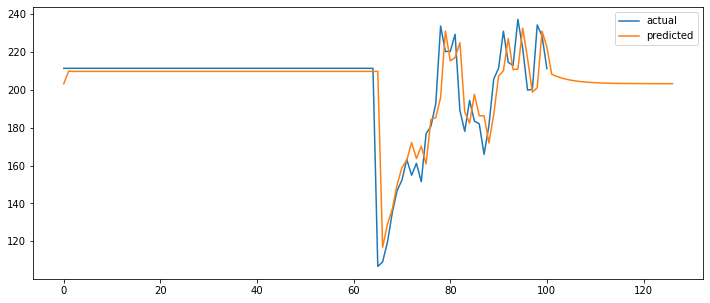

In [49]:
#Plot betwwn the actual data and Forecasted data
plt.figure(figsize=(12,5))
plt.plot(y_renew_train['renewables_energy_per_capita'].values,label='actual')
plt.plot(pred_renew.values,label='predicted')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Forecasted Renewable Energy consumption per capita')

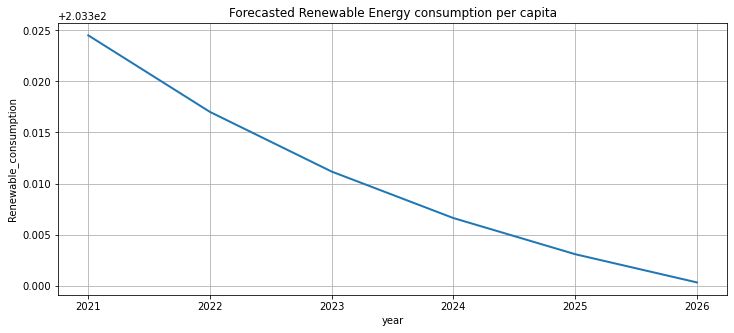

In [50]:
#Plotting predictions for next five years
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='Renewable_consumption',data=df_renew,linewidth=2)
plt.grid(True)
plt.title('Forecasted Renewable Energy consumption per capita')


In [52]:
#Saving Model as CSV
project.save_data(file_name = "Renewable_cons_forecast.csv",data = df_renew.to_csv(index=False))

{'file_name': 'Renewable_cons_forecast.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'e830b359-2517-469f-952e-d52fb9001e26'}

In [106]:
#Saving the model as JSON
project.save_data(file_name = "Renewable_cons_forecast.json",data = df_renew.to_json())

{'file_name': 'Renewable_cons_forecast.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '6718ec4d-1b38-433a-a940-1f3d90a6e7ac'}

In [92]:
#Loading CO2 data for Fossil Fuels
my_file_co2 = project.get_file('co2india.csv')
my_file_co2.seek(0)
df_reg = pd.read_csv(my_file_co2,usecols=use_cols_co2)

df_reg.head()

,year,co2_per_capita
0,1858,0.002
1,1859,0.003
2,1860,0.003
3,1861,0.002
4,1862,0.003


In [93]:
#Definining Features and Target Variables for Regression
X=df_reg.drop('co2_per_capita',axis=1)
y=df_reg['co2_per_capita']

In [94]:
#Splitting the data into Test and Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                   random_state=1)

In [95]:
#Training the Model
reg = linear_model.LinearRegression()
co2_reg=reg.fit(X_train,y_train)

In [96]:
co2_reg

LinearRegression()

In [97]:
#Creating Prediction data
list_year=[2021,2022,2023,2024,2025,2026]
df_co2=pd.DataFrame(list_year)
df_co2.columns= ['year']

In [98]:
#Predictions done on data
df_co2['CO2_pred']=co2_reg.predict(df_co2)

In [99]:
df_co2['CO2_pred']

0    1.089683
1    1.098603
2    1.107523
3    1.116443
4    1.125364
5    1.134284
Name: CO2_pred, dtype: float64

Text(0.5, 1.0, 'Forecasted CO2 Emission per capita')

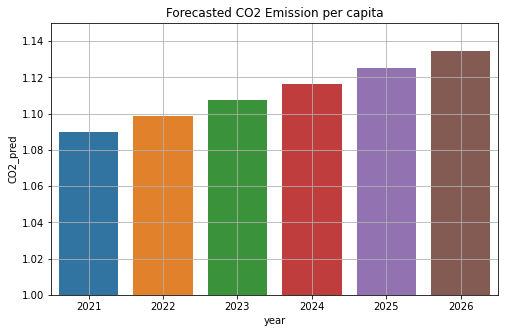

In [101]:
#Plotting the Predictions
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='CO2_pred',data=df_co2,linewidth=2)
plt.grid(True)
plt.ylim(1.00,1.15)
plt.title('Forecasted CO2 Emission per capita')

In [102]:
#Saving Predictions as CSV
project.save_data(file_name = "Co2_fossil_forecast.csv",data = df_co2.to_csv(index=False))

{'file_name': 'Co2_fossil_forecast.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': '503f1c4b-c225-40b7-a7e5-c210241ac69a'}

In [105]:
#Saving Predictions as JSON
project.save_data(file_name = "Co2_fossil_forecast.json",data = df_co2.to_json())

{'file_name': 'Co2_fossil_forecast.json',
 'message': 'File saved to project storage.',
 'bucket_name': 'mldemo-donotdelete-pr-jlcyqctqhjftt9',
 'asset_id': 'c42e0742-a20a-4050-8adf-a076e995a437'}